<h1>Extract data from EMODnet sources</h1>
<ol>
    <li>Aquaculture sites for finfish and shellfish farms</li>
    <li> Marine Protected areas</li>
    <li> Plastic monitoring</li>
</ol>

In [1]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.cm as cm
import geopandas as gpd
import cartopy.feature as cfeature
# import settings
import fiona
import pandas as pd
from shapely.geometry import Polygon

In [2]:
filedir = '/storage/shared/oceanparcels/output_data/data_Darshika/SeaClearlyStuff/'

<h3> 1. Aquaculture sites</h3>

In [3]:
def get_dataset(file):
    return gpd.read_file(file)

In [4]:
    #bounding box for farms
top_lat, bottom_lat = 46, 30
left_lon, right_lon = -7, 37

In [5]:
def get_relevant_locations(locations):
    lat = []
    lon = []

    for i in range(len(locations)):
        if locations[i] is not None:
            lon.append(locations[i].x)
            lat.append(locations[i].y)

    lat = np.array(lat)
    lon = np.array(lon)
    # filter mediterranean region points only- get indexes first

    ids = np.where(np.logical_and(np.logical_and(lat >= bottom_lat, lat <= top_lat), np.logical_and(lon >= left_lon, lon <= right_lon)))[0]
    return lat[ids], lon[ids], ids

In [6]:
def get_dataframe(file, layer):
    gdf = gpd.read_file(file, layer=layer)
    return pd.DataFrame(gdf.values, columns=gdf.columns)

<h4>Shellfish data processing</h4> 
Data downloaded from EMODnet Human activities portal: 
<a href="https://www.emodnet-humanactivities.eu/search-results.php?dataname=Shellfish+Production">Link</a>

In [7]:
!ls /storage/shared/oceanparcels/output_data/data_Darshika/SeaClearlyStuff/

EMODnet_HA_Aquaculture_Marine_Finfish_20210913
EMODnet_HA_Aquaculture_Shellfish_20191126
EMODnet_HA_Environment_Natura2000_end2020_20210909


In [8]:
shellfish_file = filedir + "EMODnet_HA_Aquaculture_Shellfish_20191126/EMODnet_HA_Aquaculture_Shellfish_20191126.gdb"
sf_data = get_dataset(shellfish_file)
sf_lats,sf_lons, sf_index = get_relevant_locations(sf_data.geometry)
print(len(sf_index))

417


<h4>Finfish data processing</h4>
Data downloaded from EMODnet Human activities portal: 
<a href="https://www.emodnet-humanactivities.eu/search-results.php?dataname=Finfish+Production">Link</a>

In [9]:
finfish_file = filedir + "EMODnet_HA_Aquaculture_Marine_Finfish_20210913/EMODnet_HA_Aquaculture_Marine_Finfish_20210913.gdb"

layers = fiona.listlayers(finfish_file)

location_df = get_dataframe(finfish_file,layers[1])

ff_lats,ff_lons, ff_index = get_relevant_locations(location_df.geometry)
print(len(ff_index))

357


<h5>Plot both farm locations</h5> 

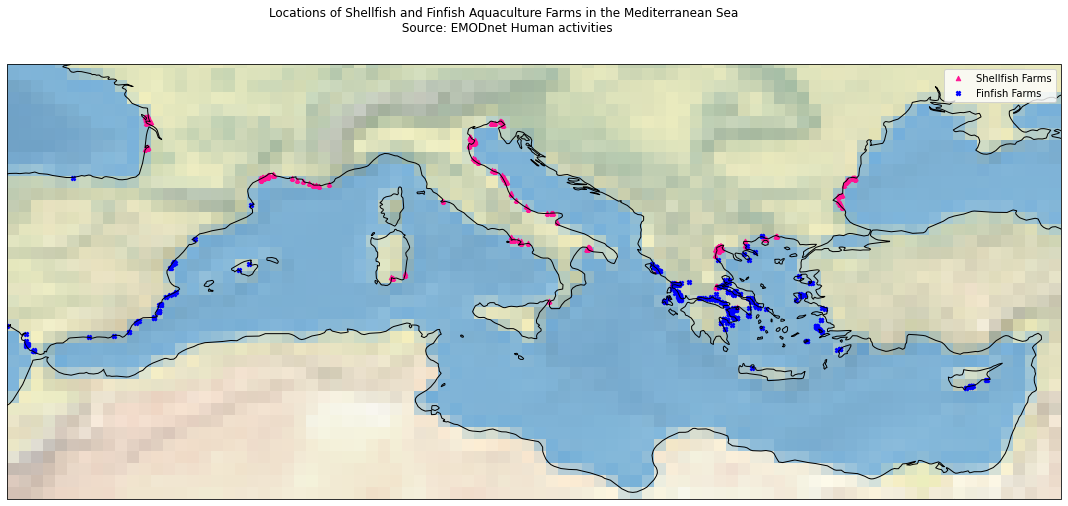

In [11]:
fig = plt.figure(figsize=(32,8))
Map_BOUNDS = [left_lon, right_lon, top_lat, bottom_lat]
plt.suptitle(
    "Locations of Shellfish and Finfish Aquaculture Farms in the Mediterranean Sea \n Source: EMODnet Human activities")
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.stock_img()
ax.set_extent(Map_BOUNDS)

ax.scatter(sf_lons, sf_lats, s=20, c='deeppink', marker="^", label='Shellfish Farms')
ax.scatter(ff_lons, ff_lats, s=20, c='blue', marker='X', label='Finfish Farms')
plt.legend()
plt.show()

<h3>2. Marine Protected Areas</h3>
Data on Natura 2000 sites downloaded from EMODnet human-activities sites: <a href="https://www.emodnet-humanactivities.eu/search-results.php?dataname=Natura+2000">Link</a>

In [12]:
gdb_file = filedir + "EMODnet_HA_Environment_Natura2000_end2020_20210909/EMODnet_HA_Environment_Natura2000_end2020_20210909.gdb" #EMODnet_HA_Environment_Natura2000_end2020_20210909/

full_data = gpd.read_file(gdb_file, bbox=(left_lon, bottom_lat, right_lon, top_lat))
data = full_data[full_data.COAST_MAR == 1]
shapes = data.geometry

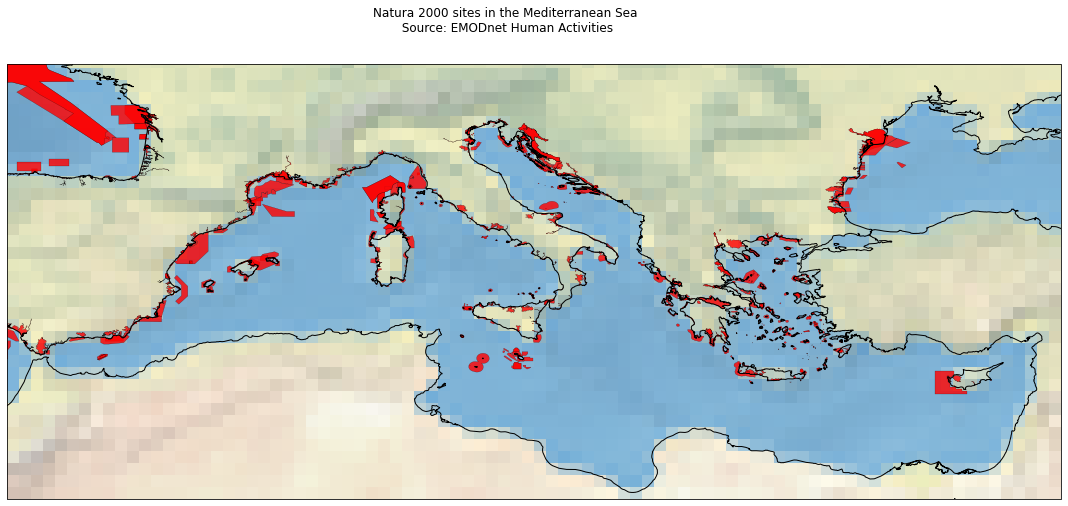

In [13]:
fig = plt.figure(figsize=(32,8))
Map_BOUNDS = [-7, 37, 46, 30]
plt.suptitle(
    "Natura 2000 sites in the Mediterranean Sea\n Source: EMODnet Human Activities")
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.stock_img()
ax.set_extent(Map_BOUNDS)


def plot_mpa(shape):
    for geom in shape.geoms:
        xs, ys = Polygon(geom).exterior.coords.xy
        ax.fill(xs, ys, c="red", alpha=0.8, edgecolor='k', linewidth=0.2)


[plot_mpa(s) for s in shapes]

plt.show()

<h3>Plastic Monitoring</h3>
Data downloaded from Blue-Cloud

### --> not included for now (code done during hackathon, see Darshika for further info.)
### (dataset used was : bl_plasticbags_other.shp)